In [1]:
from sympy import *
a, b, c, d = symbols("a b c d")

I started out (before I looked at your specific example) by setting up a slightly simpler/simplified version ...

In [2]:
M = Matrix([[1-a,a/2,0,0],[a,1-a,a/2,0],[0,a/2,1-a,0],[0,0,a/2,1]])
pprint(M)

⎡          a              ⎤
⎢-a + 1    ─       0     0⎥
⎢          2              ⎥
⎢                         ⎥
⎢                  a      ⎥
⎢  a     -a + 1    ─     0⎥
⎢                  2      ⎥
⎢                         ⎥
⎢          a              ⎥
⎢  0       ─     -a + 1  0⎥
⎢          2              ⎥
⎢                         ⎥
⎢                  a      ⎥
⎢  0       0       ─     1⎥
⎣                  2      ⎦


In [3]:
## column summation is done in sympy by multiplying by the appropriate
## row vector of ones ...
def colsums(M):
    ones = Matrix([[1]*M.shape[1]])
    return(ones*M)


Confirm row sums == 1 ...

In [4]:
print(colsums(M))

Matrix([[1, 1, 1, 1]])


Pull out $A$ and $B$ matrices, compute $B(I-A)^{-1}$ ...

In [5]:
n = M.shape[0]
z = 1 # number of absorbing states
A = M[:n-z,:n-z]
B = M[-1:,:n-z]
F = (eye(n-z)-A)**(-1)
pprint(B*F)

[1  1  1]


Moving on to your example:

In [6]:
rho, T = symbols("rho T")
c1 = (1-rho)*(1+T)/2
c2 = (1-rho)*(1-T)/2
M2 = Matrix([[rho,c1,0,0],[1-rho,rho,c1,0],[0,c2,rho,0],[0,0,c2,1]])
pprint(M2)

⎡        (T + 1)⋅(-ρ + 1)                       ⎤
⎢  ρ     ────────────────           0          0⎥
⎢               2                               ⎥
⎢                                               ⎥
⎢                           (T + 1)⋅(-ρ + 1)    ⎥
⎢-ρ + 1          ρ          ────────────────   0⎥
⎢                                  2            ⎥
⎢                                               ⎥
⎢        (-T + 1)⋅(-ρ + 1)                      ⎥
⎢  0     ─────────────────          ρ          0⎥
⎢                2                              ⎥
⎢                                               ⎥
⎢                           (-T + 1)⋅(-ρ + 1)   ⎥
⎢  0             0          ─────────────────  1⎥
⎣                                   2           ⎦


Here it turns out we need `simplify()` to confirm that the row sums are 1 ... `sympy` isn't quite clever enough to do it automatically ...

In [7]:
cc = colsums(M2)
print(simplify(cc))

Matrix([[1, 1, 1, 1]])


Alternatively, we can use `.evalf()` to substitute in numeric values (hopefully generic) ...

In [8]:
cc.evalf(subs={rho: 0.1, T:0.5})

Matrix([[1.0, 1.0, 1.0, 1.0]])

Now redo the computation of absorbing states.

In [9]:
A = M2[:n-z,:n-z]
B = M2[-1:,:n-z]
F = (eye(n-z)-A)**(-1)
pprint(B*F)

⎡         2                            2         2                      ⎤
⎢-(-T + 1) ⋅(-ρ + 1)⋅(ρ - 1)   (-T + 1) ⋅(-ρ + 1)     (-T + 1)⋅(-ρ + 1) ⎥
⎢────────────────────────────  ────────────────────  ───────────────────⎥
⎢                       2                         2    ⎛T⋅ρ   T   ρ   1⎞⎥
⎢      ⎛T⋅ρ   T   ρ   1⎞         ⎛T⋅ρ   T   ρ   1⎞   2⋅⎜─── - ─ - ─ + ─⎟⎥
⎢    4⋅⎜─── - ─ - ─ + ─⎟       4⋅⎜─── - ─ - ─ + ─⎟     ⎝ 2    2   2   2⎠⎥
⎣      ⎝ 2    2   2   2⎠         ⎝ 2    2   2   2⎠                      ⎦


This looks ugly, but simplifying shows it's OK.

In [10]:
pprint(simplify(B*F))

[1  1  1]


Or substitute numeric values ...

In [11]:
(B*F).evalf(subs={rho: 0.1, T:0.5})

Matrix([[1.0, 1.0, 1.0]])

Unfortunately, $F$ (which is what we'd really like to know about, since it captures non-trivial information about expected residency times before absorption) doesn't simplify as nicely.

In [12]:
print(simplify(F))

Matrix([
[-(T**2 + 3)/(T**2*rho - T**2 - 2*T*rho + 2*T + rho - 1), -(2*T + 2)/(T**2*rho - T**2 - 2*T*rho + 2*T + rho - 1), (T + 1)**2*(-rho + 1)/(T*rho - T - rho + 1)**2],
[         -4/(T**2*rho - T**2 - 2*T*rho + 2*T + rho - 1),         -4/(T**2*rho - T**2 - 2*T*rho + 2*T + rho - 1),  -2*(T + 1)*(rho - 1)/(T*rho - T - rho + 1)**2],
[                                2/(T*rho - T - rho + 1),                                2/(T*rho - T - rho + 1),                        2/(T*rho - T - rho + 1)]])


We could hope that the column sums (if not the elements themselves) were simple - but no ... 

In [13]:
csF = colsums(F)
print(simplify(csF))

Matrix([[(-T**2 + 2*T - 9)/(T**2*rho - T**2 - 2*T*rho + 2*T + rho - 1), -8/(T**2*rho - T**2 - 2*T*rho + 2*T + rho - 1), -(T**2 + 2*T + 5)/(T**2*rho - T**2 - 2*T*rho + 2*T + rho - 1)]])


What if we set the "tilt" to zero? Does it simplify then?

In [14]:
simplify(csF.subs(T,0))

Matrix([[-9/(rho - 1), -8/(rho - 1), -5/(rho - 1)]])

Only a little bit. Next step: make the matrix a little larger (with the same pattern) and see if the pattern of column sums is identifiable

In [ ]:
import numpy as np
## https://stackoverflow.com/questions/17069864/what-is-the-best-way-to-convert-a-sympy-matrix-to-a-numpy-array-matrix
def numcolsums(rhoval,Tval):
     M = csF.evalf(subs={rho: rhoval, T:Tval})
     return(np.array(M.tolist()).astype(np.float64))
np.array(numcolsums(0.1,0.1))

In [28]:
rhovec = np.linspace(0.01,0.5,31)
Tvec = np.linspace(0,0.5,31)
time1 = np.zeros((len(rhovec),len(Tvec),3))
for i in range(len(rhovec)):
    ## print(".")
    for j in range(len(Tvec)):
        ## flip order for contour plot
        time1[j,i,:] = numcolsums(rhovec[i],Tvec[j])

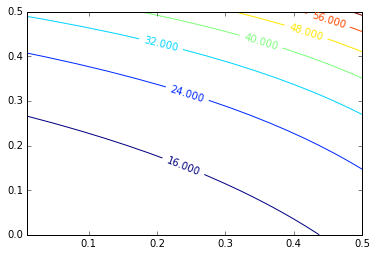

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
CS = plt.contour(rhovec,Tvec,time1[:,:,0]);
plt.clabel(CS, inline=1, fontsize=10);